In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [4]:
img1 = cv2.imread("../Computer-Vision-with-Python/DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../Computer-Vision-with-Python/DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

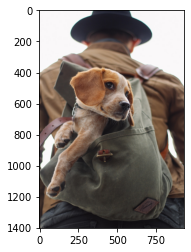

In [5]:
plt.imshow(img1)

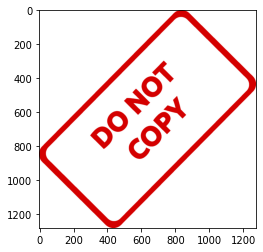

In [6]:
plt.imshow(img2)

In [7]:
img1.shape

(1401, 934, 3)

In [8]:
img2.shape

(1280, 1277, 3)

Blending images with the same shape

In [9]:
img1 = cv2.resize(img1, (900, 900))
img2 = cv2.resize(img2, (900, 900))

In [10]:
print(img1.shape, img2.shape)

(900, 900, 3) (900, 900, 3)


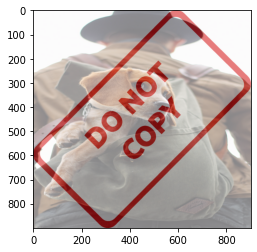

In [21]:
blended = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
plt.imshow(blended)

Blending images with different shapes

In [55]:
img1 = cv2.imread("../Computer-Vision-with-Python/DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../Computer-Vision-with-Python/DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [48]:
print(img1.shape, img2.shape)

(1401, 934, 3) (1280, 1277, 3)


In [57]:
img2 = cv2.resize(img2, (600, 600))

In [50]:
img2.shape

(600, 600, 3)

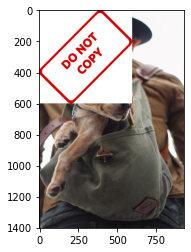

In [40]:
# img[y,x]
img1[0:img2.shape[0], 0:img2.shape[1]] = img2
plt.imshow(img1)

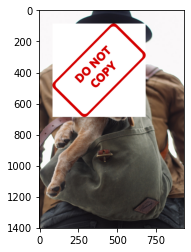

In [52]:
# img[y,x]

offset = 87

img1[offset:offset+img2.shape[0], offset:offset+img2.shape[1]] = img2
plt.imshow(img1)

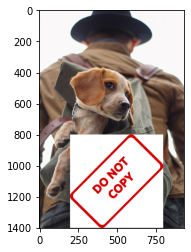

In [58]:
# img[y,x]

offset_x = 200
offset_y = 800

img1[offset_y:offset_y+img2.shape[0], offset_x:offset_x+img2.shape[1]] = img2
plt.imshow(img1)

### Create a Region of Interest (ROI)

In [25]:
img1.shape

(1401, 934, 3)

In [26]:
x_offset=934-600
y_offset=1401-600

In [27]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER

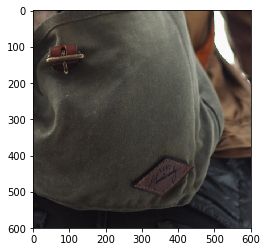

In [28]:
plt.imshow(roi)

In [29]:
roi.shape

(600, 600, 3)

### Creating a Mask

In [30]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [31]:
img2gray.shape

(600, 600)

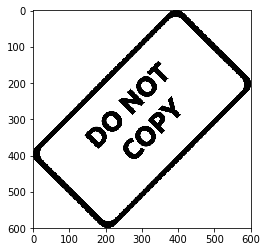

In [32]:
plt.imshow(img2gray,cmap='gray')

In [33]:
mask_inv = cv2.bitwise_not(img2gray)

In [34]:
mask_inv.shape

(600, 600)

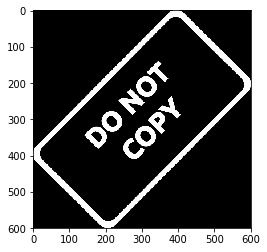

In [35]:
plt.imshow(mask_inv,cmap='gray')

## Convert Mask to have 3 channels

In [36]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [37]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [38]:
bk.shape

(600, 600, 3)

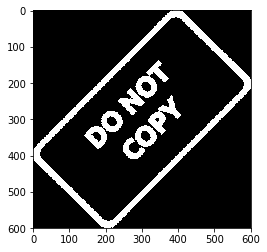

In [39]:
plt.imshow(bk)

### Grab Original FG image and place on top of Mask

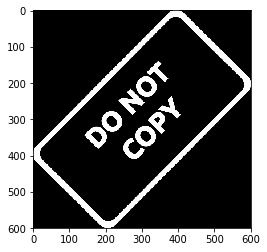

In [40]:
plt.imshow(mask_inv,cmap='gray')

In [41]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

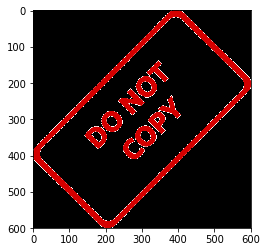

In [42]:
plt.imshow(fg)

In [43]:
fg.shape

(600, 600, 3)

### Get ROI and blend in the mask with the ROI

In [44]:
final_roi = cv2.bitwise_or(roi,fg)

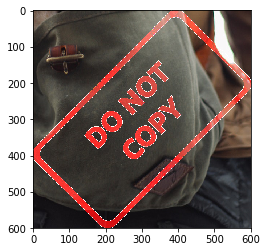

In [45]:
plt.imshow(final_roi)

### Now add in the rest of the image

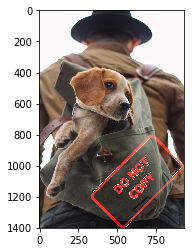

In [46]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)

### Great Work!

Check out these documentation examples and links for more help for these kinds of tasks (which can be really tricky!)

1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html